<a href="https://colab.research.google.com/github/Yash-Bandal/Advance-Python-/blob/main/Sci_KitLearnYash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Modellinng

### Iris Dataset

In [3]:
iris=load_iris()  #or iris=sns.load_dataset('iris')

iris_df=pd.DataFrame(data=iris.data ,columns=iris.feature_names)
#add target
iris_df['species'] = iris.target_names[iris.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Loading DataSet

In [ ]:
iris=load_iris()
x=iris.data
y=iris.target
columns=iris.feature_names
target_names=iris.target_names

#print("Data within/Feature Matrix \n:",x)
#print("Response vector :\n",y)
print("Feature names : ",columns)
print("Target names:",target_names)

iris_df=pd.DataFrame(x ,columns=iris.feature_names)
#add target
iris_df['species'] = iris.target_names[y]
iris_df.head()

Feature names :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Splitting

In [ ]:
from sklearn.model_selection import train_test_split

#70 30 split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3 ,random_state = 1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)  #(105,) ie (105,1) same

#print(x_train)
#print(y_train)

(105, 4)
(45, 4)
(105,)
(45,)


## Training

Accuracy :  0.9777777777777777
Predictions: ['versicolor', 'virginica']


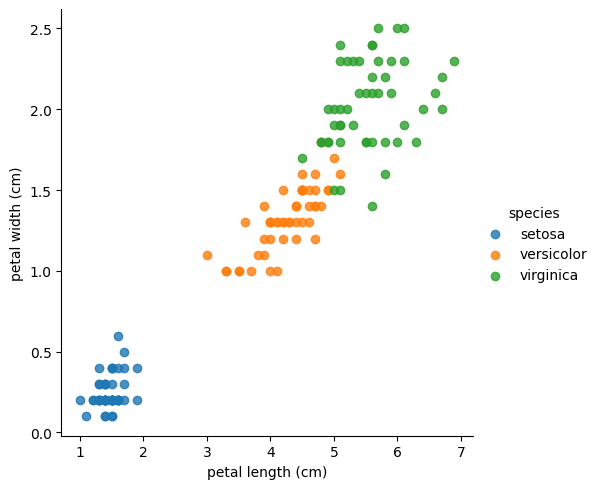

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

classifier_knn = KNeighborsClassifier(n_neighbors = 3 )  # model variable Like a machine is brought
classifier_knn.fit(x_train , y_train) #fit into var  fit in machine

y_pred=classifier_knn.predict(x_test)

print("Accuracy : ",metrics.accuracy_score(y_test,y_pred))

sample=[[5,5,3,2] , [2,4,3,5]]
preds=classifier_knn.predict(sample)

pred_species = [iris.target_names[p] for p in preds]

print("Predictions:", pred_species)

#reivse
#1. Extract x y and df
#2. TrainTestslpit ..get trainning test data
#3. First define classifier then Fit into classifier model
#4. Predict
#5. accuracy

sns.lmplot(x='petal length (cm)', y='petal width (cm)', data=iris_df, hue='species', fit_reg=False)


## Model Persistence

In [ ]:
#not runned but do
from sklearn.externals import joblib
joblib.dump(classifier_knn, 'iris_classifier_knn.joblib')  #filename
joblib.load('iris_classifier_knn.joblib')


## Preprocessing

In [ ]:
#1 Binarisation

import numpy as np
from sklearn import preprocessing
Input_data = np.array(
   [[2.1, -1.9, 5.5],
   [-1.5, 2.4, 3.5],
   [0.5, -7.9, 5.6],
   [5.9, 2.3, -5.8]]
)
# binary_matrix    module       function                 property
data_binarized = preprocessing.Binarizer(threshold=0.5).transform(Input_data)
print("\nBinarized data:\n", data_binarized)




Binarized data:
 [[1. 0. 1.]
 [0. 1. 1.]
 [0. 0. 1.]
 [1. 1. 0.]]


In [ ]:
#2 Mean removal
#display mean and sd
print("Mean :",Input_data.mean(axis = 0))
print("Std :",Input_data.std(axis = 0))

#Removing
data_scaled = preprocessing.scale(Input_data)

#removed

#verify
print("Mean_removed =", data_scaled.mean(axis=0))
print("Stddeviation_removed =", data_scaled.std(axis=0))


Mean : [ 1.75  -1.275  2.2  ]
Std : [2.71431391 4.20022321 4.69414529]
Mean_removed = [1.11022302e-16 0.00000000e+00 0.00000000e+00]
Stddeviation_removed = [1. 1. 1.]


In [ ]:
print(data_scaled)

[[ 0.12894603 -0.14880162  0.70300338]
 [-1.19735598  0.8749535   0.27694073]
 [-0.46052153 -1.57729713  0.72430651]
 [ 1.52893149  0.85114524 -1.70425062]]


In [ ]:
#3 Scaling- scale down

data = preprocessing.MinMaxScaler(feature_range=(0,1)) #model
#fit in model and transform
data = data.fit_transform(Input_data)

data

array([[0.48648649, 0.58252427, 0.99122807],
       [0.        , 1.        , 0.81578947],
       [0.27027027, 0.        , 1.        ],
       [1.        , 0.99029126, 0.        ]])

In [ ]:
#4.standard sacler

data = preprocessing.StandardScaler()

data= data.fit_transform(Input_data)
data

array([[ 0.12894603, -0.14880162,  0.70300338],
       [-1.19735598,  0.8749535 ,  0.27694073],
       [-0.46052153, -1.57729713,  0.72430651],
       [ 1.52893149,  0.85114524, -1.70425062]])

In [ ]:
#5.LabelBinarizer

import numpy as np
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer

InputData = np.array([["Label1"], ["Label2"], ["Label1"], ["Label3"], ["Label1"]])

labels = preprocessing.LabelBinarizer()
labels.fit_transform(InputData)

labels.classes_



array(['Label1', 'Label2', 'Label3'], dtype='<U6')

In [ ]:
#6. preprocessing.OneHotEncoder()
from sklearn.preprocessing import OneHotEncoder
# Create OneHotEncoder instance
encoder = OneHotEncoder()

# Fit the encoder to the data and transform it
data = encoder.fit_transform(InputData).toarray()
data

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
#7 Normalisation
# 1. L1 Least absolute ev --sum                                               #axis 1  -------------->
                                                                              #axis 0  |
data_normalized_l1 = preprocessing.normalize(Input_data, norm='l1')           #        |
print("\nL1 normalized data:\n", data_normalized_l1)                          #        |
                                                                              #        |
absolute_row_sums = np.sum(np.abs(data_normalized_l1), axis=1)                #        v
print("Row sum ",absolute_row_sums)

# 2 .L2 least squares
Input_data = np.array(
   [
      [2.1, -1.9, 5.5],
      [-1.5, 2.4, 3.5],
      [0.5, -7.9, 5.6],
      [5.9, 2.3, -5.8]
   ]
)
data_normalized_l2 = preprocessing.normalize(Input_data, norm='l2')
print("\nL1 normalized data:\n", data_normalized_l2)

absolute_row_sums2 = np.sum(np.abs(data_normalized_l2), axis=1)
print("Row sum ",absolute_row_sums2)


L1 normalized data:
 [[ 0.22105263 -0.2         0.57894737]
 [-0.2027027   0.32432432  0.47297297]
 [ 0.03571429 -0.56428571  0.4       ]
 [ 0.42142857  0.16428571 -0.41428571]]
Row sum  [1. 1. 1. 1.]

L1 normalized data:
 [[ 0.33946114 -0.30713151  0.88906489]
 [-0.33325106  0.53320169  0.7775858 ]
 [ 0.05156558 -0.81473612  0.57753446]
 [ 0.68706914  0.26784051 -0.6754239 ]]
Row sum  [1.53565753 1.64403856 1.44383615 1.63033356]


In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
#data with nan

Input_data = np.array([
    [np.nan,3],
    [4,np.nan],
    [5,6]
])

data=SimpleImputer(strategy='maen')
data=imputer.fit_transform(Input_data)

data

array([[4.5, 3. ],
       [4. , 4.5],
       [5. , 6. ]])

# Scikit Learn - Data Representation

# Estimator

In [ ]:
#estimator


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create an estimator object
estimator = LogisticRegression()

# You can then fit the estimator to your data using the fit() method
 #estimator.fit(x_train, y_train)


##(2) Linear Regression () =>

In [ ]:
#Model
import numpy as np
import pandas as pd

#for classification
# 2D array X with 100 rows and 5 columns.Each element in X is a random
# float number between 0 and 1, generated from a uniform distribution.
X, y_classification = np.random.rand(100, 5), np.random.randint(0, 2, size=100)

#for regression
#This line generates a 1D array y_classification containing 100 integers.
#Each integer is randomly chosen from the set {0, 1}.

y_regression = np.random.rand(100)

#------------------------------------------------------------

#for classification
X, y_classification = np.random.rand(100, 5), np.random.randint(0, 2, size=100)

#for regression
#This line generates a 1D array y_classification containing 100 integers.
#Each integer is randomly chosen from the set {0, 1}.

y_regression = np.random.rand(100)
from sklearn.model_selection import train_test_split

#Split the dataset into training and testing sets
#The test_size=0.2 => parameter indicates that 20% of the data will be reserved for testing, while the remaining 80% will be used for training
#random_state=42  => ensures that the data is split in the same way every time the code is run, allowing for reproducible results.

X_train, X_test, y_train_classification, y_test_classification = train_test_split(X, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

#-------------------------------------------------------------------
from sklearn.linear_model import LinearRegression

#LinearRegression class is being created and stored in the variable lin_reg.
lin_reg = LinearRegression()

#X_train_reg =>  represents the independent variable(s) of the training dataset.
#y_train_reg =>  represents the dependent variable in the training dataset.
#The fit() =>  method trains the linear regression model on the training data.

lin_reg.fit(X_train_reg, y_train_reg)

#retrieves the coefficients of the linear regression model using the coef_ attribute.
print("Linear Regression Coefficients:", lin_reg.coef_)

Linear Regression Coefficients: [-0.02439341 -0.13302163 -0.02021217 -0.12173892  0.09346069]


##on iris

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Iris dataset
iris = load_iris()
x = iris.data  # Feature matrix
y = iris.target  # Response vector
columns = iris.feature_names
target_names = iris.target_names

print("Feature names: ", columns)
print("Target names:", target_names)

# Create a DataFrame for better visualization
iris_df = pd.DataFrame(x, columns=iris.feature_names)

# Add the target 'species' column using target names
iris_df['species'] = iris.target_names[y]
print(iris_df.head())  # Show first few rows

# Train-test split (70% train, 30% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

print("Training Data Shape:", x_train.shape)
print("Test Data Shape:", x_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Test Labels Shape:", y_test.shape)




Feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
Training Data Shape: (105, 4)
Test Data Shape: (45, 4)
Training Labels Shape: (105,)
Test Labels Shape: (45,)


In [ ]:
 # Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 score): {r2}")

Mean Squared Error (MSE): 0.05506284382248198
R-squared (R2 score): 0.9081529993900115


##(3)LogisticRegression () =>

In [ ]:
from sklearn.linear_model import LogisticRegression

# creates an instance of the LogisticRegression class and stores it in the variable log_reg.
log_reg = LogisticRegression()

#X_train represents => (independent variables) of the training dataset.
#y_train_classification represents => (dependent variable),

log_reg.fit(x_train, y_train)
print("Logistic Regression Coefficients:", log_reg.coef_)

Logistic Regression Coefficients: [[-0.4346298   0.76021294 -2.24087351 -0.93260619]
 [ 0.57993789 -0.53810954 -0.1299831  -0.79998699]
 [-0.14530809 -0.2221034   2.37085661  1.73259318]]


##(4)DecisionTreeClassifier () =>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train_classification)

#This line checks how good the decision tree model is at making predictions and shows the result.
#X_test: This is the new data (features) that the model hasn't seen before.
#y_test_classification: This is the real answers for the new data.

print("Decision Tree Classifier Score:", dt_classifier.score(X_test, y_test_classification))

Decision Tree Classifier Score: 0.55


##(6)RandomForestClassifier () =>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train_classification)

#X_test: This is the new data (features) that the model hasn't seen before.
#y_test_classification: This is the real answers for the new data.
print("Random Forest Classifier Score:", rf_classifier.score(X_test, y_test_classification))


Random Forest Classifier Score: 0.45


##(7)RandomForestRegressor () =>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train_reg, y_train_reg)

#X_test_reg: This is the new data (features) that the model hasn't seen before.
#y_test_reg: This is the real answers for the new data.
print("Random Forest Regressor Score:", rf_regressor.score(X_test_reg, y_test_reg))


##8) GradientBoostingClassifier () =>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train_classification)

#X_test: This is the new data (features) that the model hasn't seen before.
#y_test_classification: This is the real answers for the new data.
print("Gradient Boosting Classifier Score:", gb_classifier.score(X_test, y_test_classification))


Gradient Boosting Classifier Score: 0.45


##(9)Support Vector Classifier() =>

Support Vector Classifier Score: 0.9777777777777777


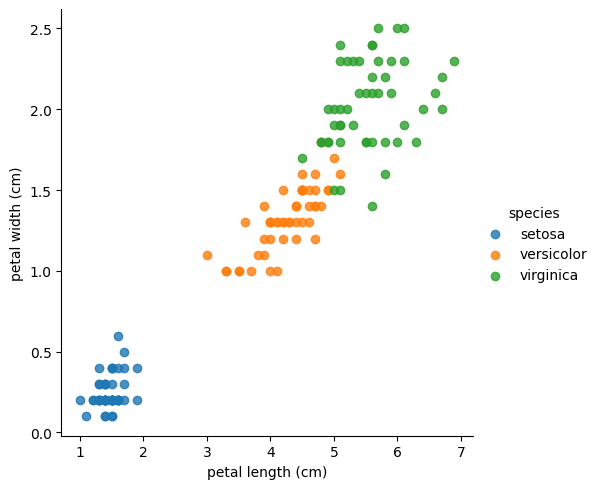

In [7]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

#X_test: This is the new data (features) that the model hasn't seen before.
#y_test_classification: This is the real answers for the new data.
print("Support Vector Classifier Score:", svc.score(x_test, y_test))

#classifiification and regression ..w r t hyperplane and supporting vectors
sns.lmplot(x='petal length (cm)', y='petal width (cm)', data=iris_df, hue='species', fit_reg=False)


##(10) Support Vector Regression() =>

In [ ]:
from sklearn.svm import SVR
# Support Vector Regressor
svr = SVR()
svr.fit(X_train_reg, y_train_reg)

#X_test_reg: This is the new data (features) that the model hasn't seen before.
#y_test_reg: This is the real answers for the new data.
print("Support Vector Regressor Score:", svr.score(X_test_reg, y_test_reg))


Support Vector Regressor Score: -0.6625229090838516


##(11)K-Neighbors Classifier () =>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNeighborsClassifier
kn_classifier = KNeighborsClassifier()

# Fit the model using the training data
kn_classifier.fit(x_train,y_train)

# X_test: This is the new data (features) that the model hasn't seen before.
# y_test_classification: This is the real answers for the new data.
print("K-Nearest Neighbors Classifier Score:", kn_classifier.score(x_test, y_test))


K-Nearest Neighbors Classifier Score: 0.9777777777777777
